In [2]:
### Import Required Libraries
import pandas as pd
import numpy as np
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### Reasing dataset
data = pd.read_csv("creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
count_class = pd.value_counts(data['Class'])
count_class

0.0    59348
1.0      162
Name: Class, dtype: int64

Text(0.5, 0, 'Class')

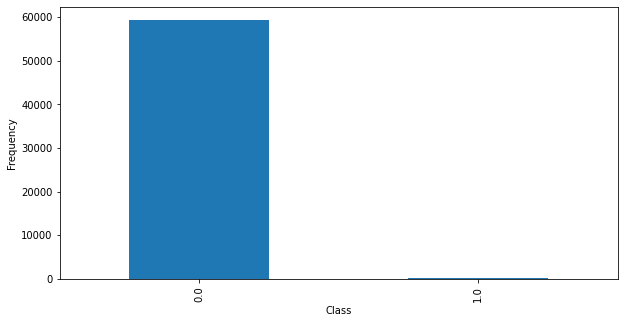

In [7]:
plt.figure(figsize=(10,5))
count_class.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Class')

In [9]:
### standardizing the coloumn amount
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['s_Amount']=sc.fit_transform(data['Amount'].values.reshape(-1,1))

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,s_Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.200665
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.343294
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.048608
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.103964
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,-0.094138


In [12]:
### Dropping coloumns amount and time
data = data.drop(['Time','Amount'],axis=1)
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 's_Amount'],
      dtype='object')

In [16]:
### Splitting the data in to X and Y variables
x = data.loc[:,data.columns!='Class']
y= data.Class

In [17]:
### split the data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state =42)

In [19]:
### Sampling Techniques
### Random Oversampling
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

"Define Oversampling Strategy"
oversample = RandomOverSampler(sampling_strategy=0.2)

"fit and apply the tranform"
X_over_train,y_over_train = oversample.fit_resample(x_train,y_train)

"Summarize class distribution"
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes before fit{}".format(Counter(y_over_train)))
print(Counter(y_over_train))

The number of classes before fitCounter({0.0: 41546, 1.0: 111})
The number of classes before fitCounter({0.0: 41546, 1.0: 8309})
Counter({0.0: 41546, 1.0: 8309})


In [20]:
count_class =pd.value_counts(y_over_train)
print(count_class)


0.0    41546
1.0     8309
Name: Class, dtype: int64


Text(0.5, 0, 'Class')

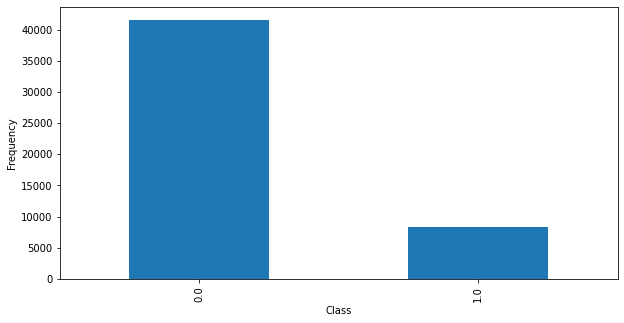

In [21]:
plt.figure(figsize=(10,5))
count_class.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Class')

In [37]:
### Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

"Define Undersampling Strategy"
undersample = RandomUnderSampler(sampling_strategy='majority')

"fit and apply the tranform"
X_under_train,y_under_train = undersample.fit_resample(x_train,y_train)

"Summarize class distribution"
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes before fit{}".format(Counter(y_over_train)))
print(Counter(y_over_train))

The number of classes before fitCounter({0.0: 41546, 1.0: 111})
The number of classes before fitCounter({0.0: 41546, 1.0: 8309})
Counter({0.0: 41546, 1.0: 8309})


0.0    111
1.0    111
Name: Class, dtype: int64


Text(0.5, 0, 'Class')

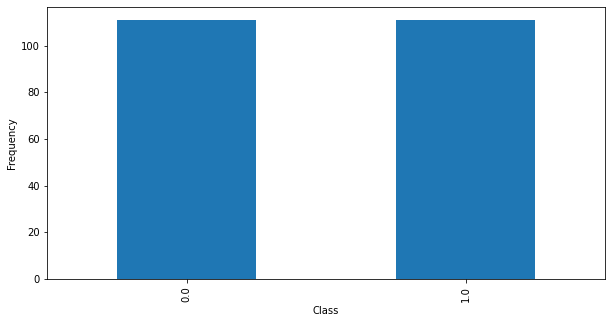

In [25]:
count_class =pd.value_counts(y_under_train)
print(count_class)

plt.figure(figsize=(10,5))
count_class.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Class')

In [26]:
### NearMiss Undersampling

from imblearn.under_sampling import NearMiss
ns = NearMiss()

"fit and apply the tranform"
X_train_ns,y_train_ns=ns.fit_resample(x_train,y_train)

"Summarize class distribution"
print("The number of classes before fit{}".format(Counter(y_train_ns)))
print("The number of classes before fit{}".format(Counter(y_train_ns)))
print(Counter(y_train_ns))

The number of classes before fitCounter({0.0: 111, 1.0: 111})
The number of classes before fitCounter({0.0: 111, 1.0: 111})
Counter({0.0: 111, 1.0: 111})


0.0    111
1.0    111
Name: Class, dtype: int64


Text(0.5, 0, 'Class')

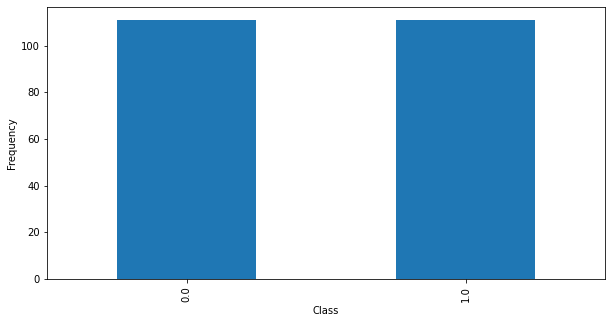

In [28]:
count_class =pd.value_counts(y_train_ns)
print(count_class)

plt.figure(figsize=(10,5))
count_class.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Class')

In [36]:
### Undersampling with Tomek Links
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

"fit and apply the tranform"
X_train_tomek,y_train_tomek=tl.fit_resample(x_train,y_train)

"Summarize class distribution"
print("The number of classes before fit{}".format(Counter(y_train_tomek)))
print("The number of classes before fit{}".format(Counter(y_train_tomek)))
print(Counter(y_train_tomek))

The number of classes before fitCounter({0.0: 41539, 1.0: 111})
The number of classes before fitCounter({0.0: 41539, 1.0: 111})
Counter({0.0: 41539, 1.0: 111})


0.0    111
1.0    111
Name: Class, dtype: int64


Text(0.5, 0, 'Class')

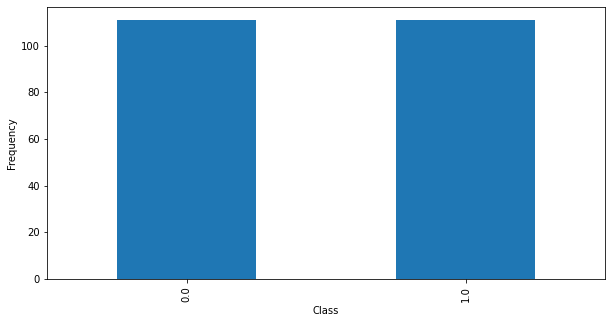

In [32]:
count_class =pd.value_counts(y_train_tomek)
print(count_class)

plt.figure(figsize=(10,5))
count_class.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Class')

In [44]:
### Undersampling using Cluster centroids

from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)

X_under_kmeans,y_under_kmeans = cc.fit_resample(x_train,y_train)

In [35]:
### SMOTE

from imblearn.over_sampling import SMOTE
strategy_s ='minority'
smote =SMOTE(sampling_strategy=strategy_s)

"fit and apply the tranform"
X_smot_train,y_smot_train=smote.fit_resample(x_train,y_train)

"Summarize class distribution"
print("The number of classes before fit{}".format(Counter(y_smot_train)))
print("The number of classes before fit{}".format(Counter(y_smot_train)))
print(Counter(y_smot_train))

The number of classes before fitCounter({0.0: 41546, 1.0: 41546})
The number of classes before fitCounter({0.0: 41546, 1.0: 41546})
Counter({0.0: 41546, 1.0: 41546})


0.0    41546
1.0    41546
Name: Class, dtype: int64


Text(0.5, 0, 'Class')

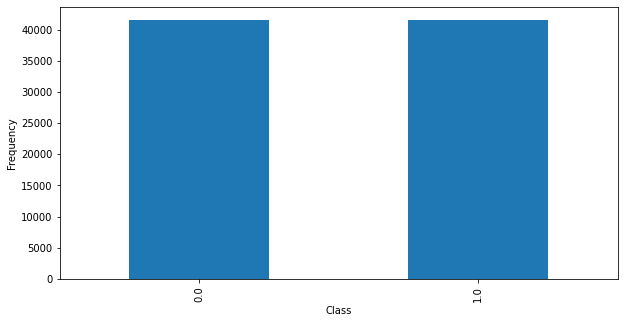

In [38]:
count_class =pd.value_counts(y_smot_train)
print(count_class)

plt.figure(figsize=(10,5))
count_class.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Class')

In [40]:
### Combination of Oversampling and Undersampling

y.shape
print(Counter(y))

"Define Oversampling Strategy"
oversample = RandomOverSampler(sampling_strategy='minority') 

"fit and apply the tranform"
X_over_train,y_over_train = oversample.fit_resample(x_train,y_train)

"Summarize the class distribution"
print(Counter(y_over_train))

"Define Undersampling Strategy"
undersample = RandomUnderSampler(sampling_strategy='majority')

"fit and apply the tranform"
X_comb,y_comb = undersample.fit_resample(X_over_train,y_over_train)


"Summarize the class distribution"
print(Counter(y_comb))

Counter({0.0: 59348, 1.0: 162, nan: 1})
Counter({0.0: 41546, 1.0: 41546})
Counter({0.0: 41546, 1.0: 41546})


0.0    41546
1.0    41546
Name: Class, dtype: int64


Text(0.5, 0, 'Class')

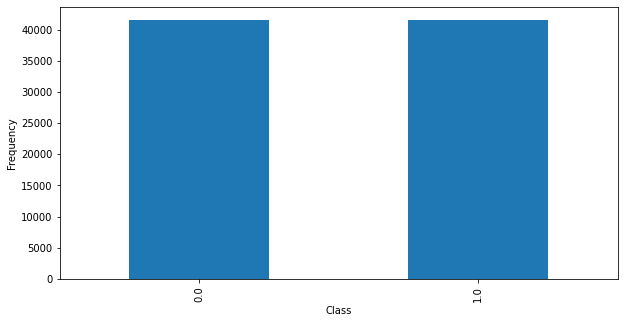

In [41]:
count_class =pd.value_counts(y_comb)
print(count_class)

plt.figure(figsize=(10,5))
count_class.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Class')

In [43]:
### Combination using SMOTE and Tomek
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
"fit and apply the tranform"
X_smote_tomek,y_smote_tomek = smote_tomek.fit_resample(x_train,y_train)

"Summarize class distribution"
print("The number of classes before fit{}".format(Counter(y_smote_tomek)))
print("The number of classes before fit{}".format(Counter(y_smote_tomek)))
print(Counter(y_smote_tomek))

The number of classes before fitCounter({0.0: 41546, 1.0: 41546})
The number of classes before fitCounter({0.0: 41546, 1.0: 41546})
Counter({0.0: 41546, 1.0: 41546})
